#### Camera pose estimation using camera parameters on a video feed.

In [11]:
#importing modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import yaml
from pathlib import Path
from scipy.spatial.transform import Rotation as rotation

In [2]:
input_video_path = "/home/suraj/ClickUp/Mar-Apr/cv-nlp-basics-to-advanced/02_CV/30-camera-pose-estimation/InputVideo.mp4"
camera_param_file= "/home/suraj/ClickUp/Mar-Apr/cv-nlp-basics-to-advanced/02_CV/30-camera-pose-estimation/output.yml"

In [4]:
cap = cv2.VideoCapture(input_video_path)
row_corner =10 # num_rows-1
col_corner = 15 # num_cols-1
width_square = 14.2 # real world width
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#terminating criterion
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


In [5]:
#creating object points
object_points = np.zeros((row_corner*col_corner,3),np.float32)

for i in range(col_corner):
    for j in range(row_corner):
        object_points[i*row_corner+j,0]= j* width_square
        object_points[i*row_corner+j,1] = i* width_square

axis = np.float32([[width_square,0,0], [0,width_square,0], [0,0,-width_square]]).reshape(-1,3)


In [10]:
# loading camera intrisic
with open(camera_param_file) as f:
    print(f)
    camera_dict = yaml.full_load(f)
    cam_mat = camera_dict['camera_matrix']
    dist_param = camera_dict['dist_coeff']
    cam_mat = np.array(cam_mat)
    cam_mat_inverse = np.linalg.inv(cam_mat)
    dist_param = np.array(dist_param)

print(cam_mat)
print("**********")
print(cam_mat_inverse)
print("*************")
print(dist_param)

<_io.TextIOWrapper name='/home/suraj/ClickUp/Mar-Apr/cv-nlp-basics-to-advanced/02_CV/30-camera-pose-estimation/output.yml' mode='r' encoding='UTF-8'>
[[ 1.93510568e+04  0.00000000e+00 -1.82958065e+02]
 [ 0.00000000e+00  2.97059107e+03  1.17402570e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
**********
[[ 5.16767642e-05  0.00000000e+00  9.45468079e-03]
 [ 0.00000000e+00  3.36633342e-04 -3.95216196e-02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
*************
[[-1.89412265e+02  9.22897040e+03  3.40107893e+00  1.32472200e+00
   1.25467837e+02]]


In [13]:
#util function to draw corners
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

Rotation Euler Angles are -77.67406002482348 -44.15308772189795 -164.99393267160346
Translation in mm is 112.04092703734668 56.91511268201798 35.10712177473564


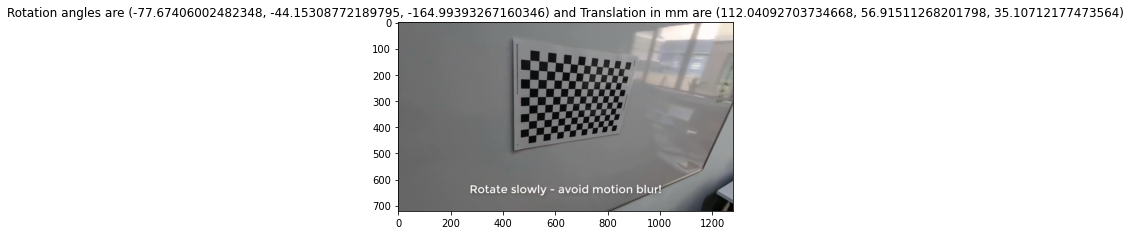

Rotation Euler Angles are -65.70927754173228 -34.55083008023949 -101.04356019266403
Translation in mm is -37.93236299146899 136.97148226472365 78.77606826489897


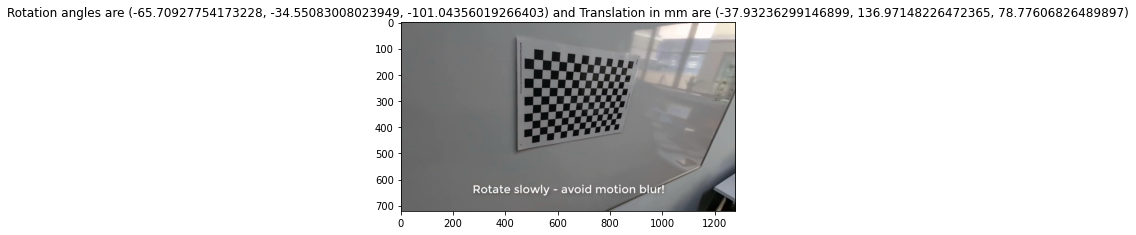

Rotation Euler Angles are -168.34342453124515 -30.48692086770301 0.4886374239219707
Translation in mm is -48.90970792449592 132.186636962801 135.57664479812206


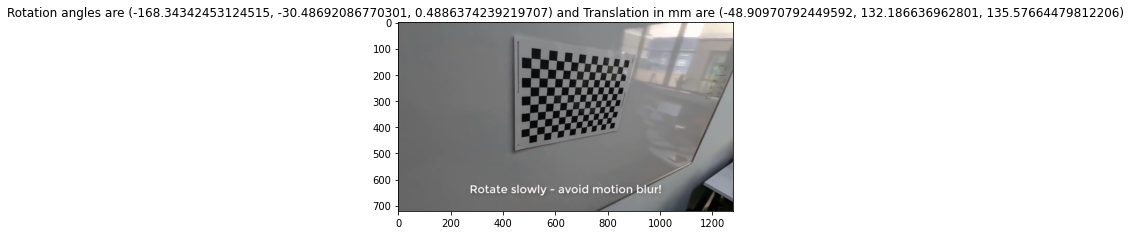

Rotation Euler Angles are -143.76416920308583 30.73086296846004 -88.54142642695638
Translation in mm is 135.44416865531383 112.65016877674837 -999.833753661686


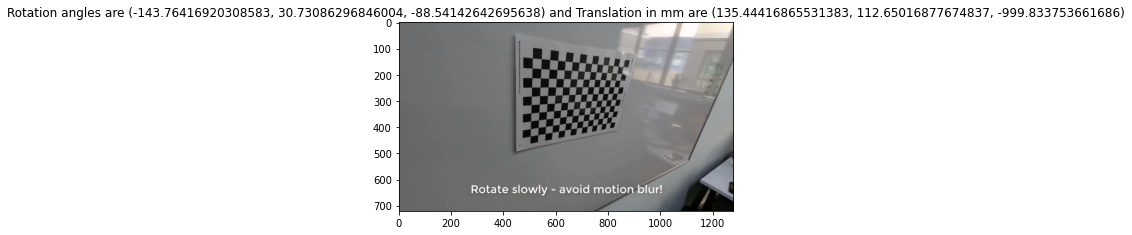

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


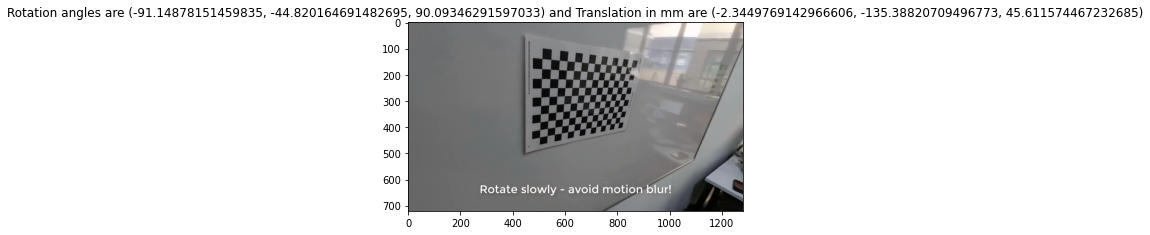

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


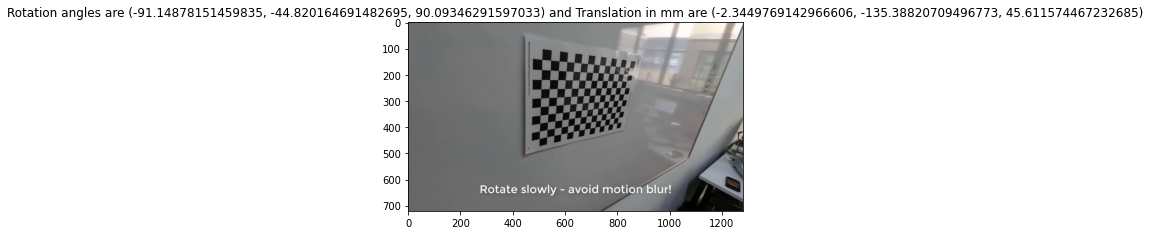

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


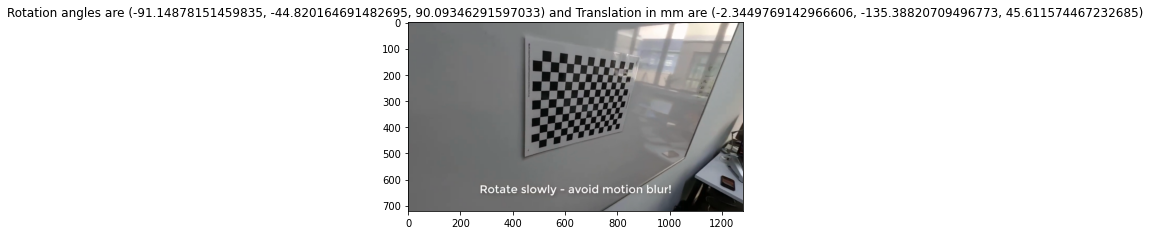

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


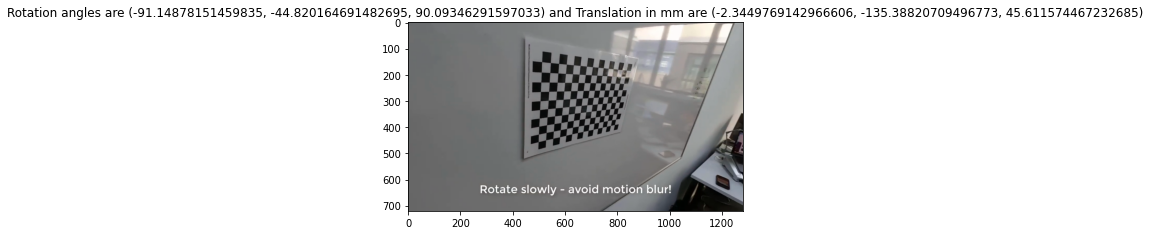

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


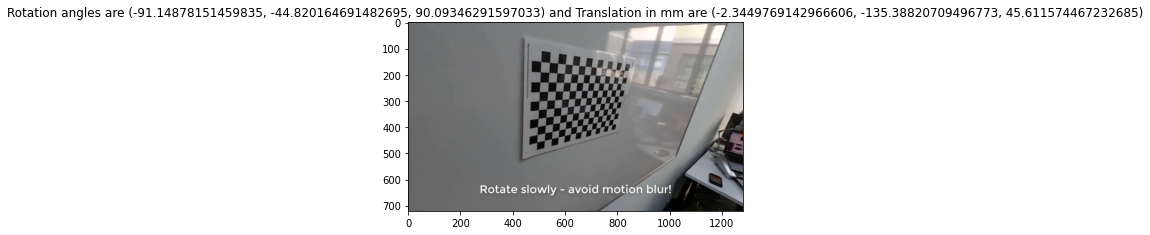

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


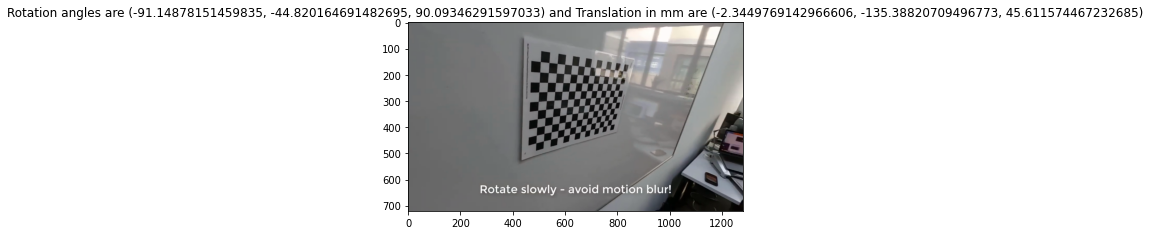

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


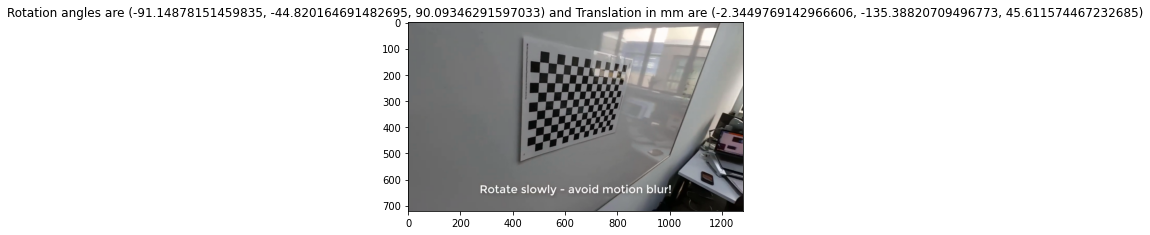

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


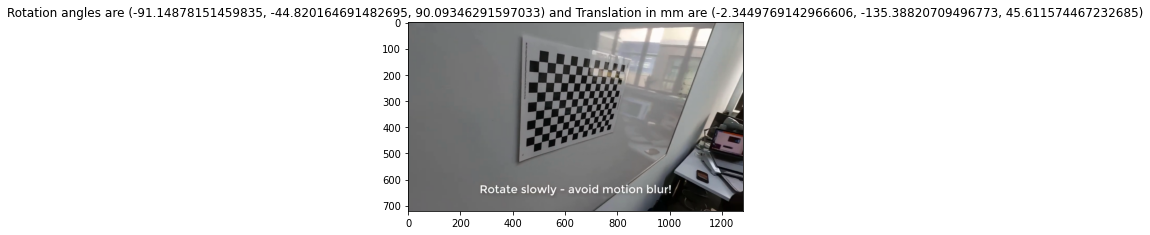

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


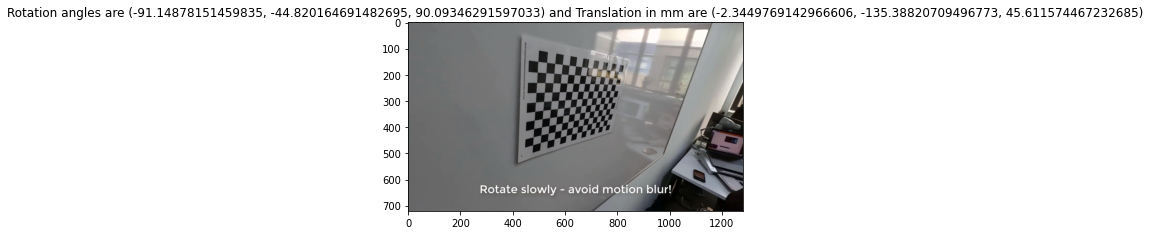

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


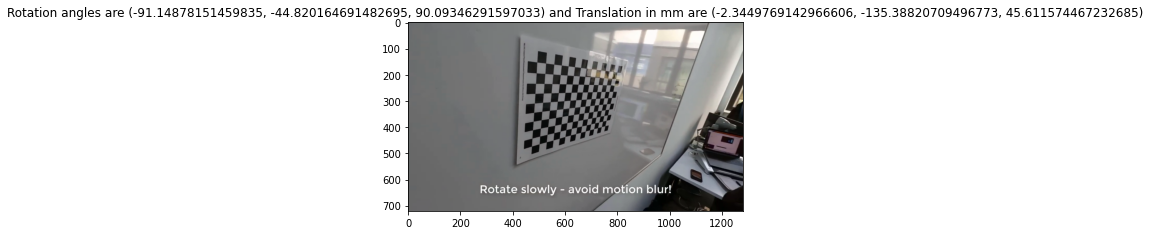

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


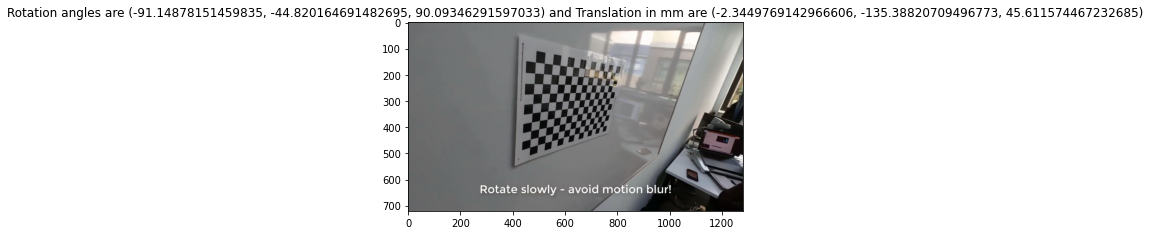

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


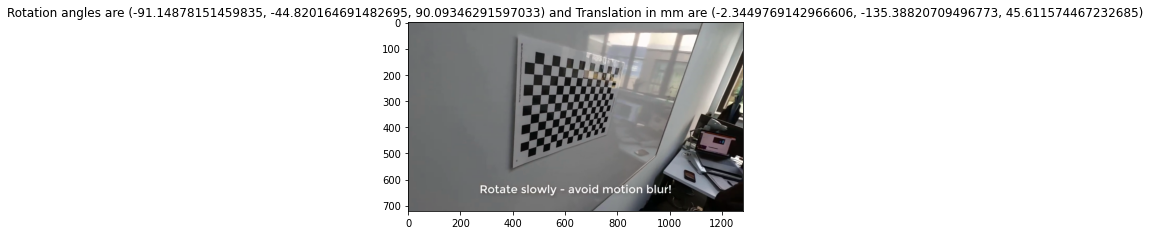

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


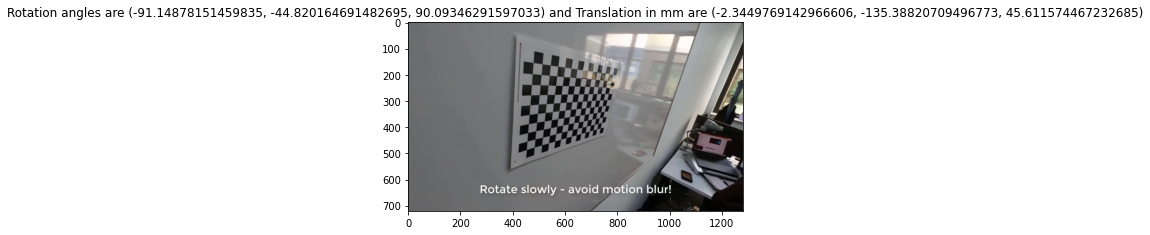

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


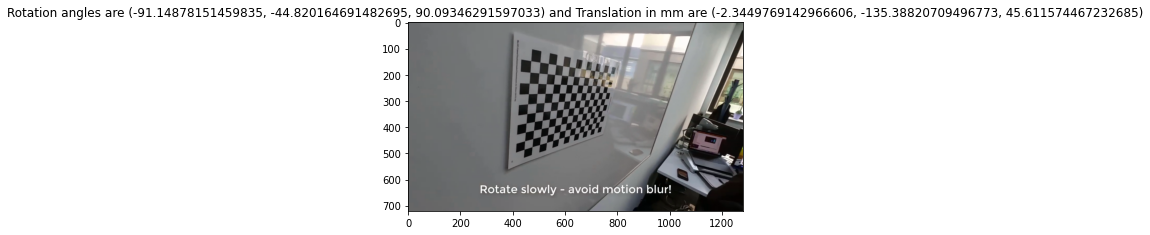

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


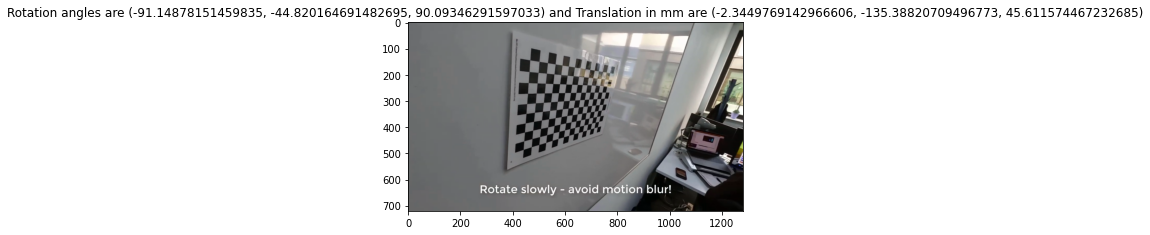

Rotation Euler Angles are -91.14878151459835 -44.820164691482695 90.09346291597033
Translation in mm is -2.3449769142966606 -135.38820709496773 45.611574467232685


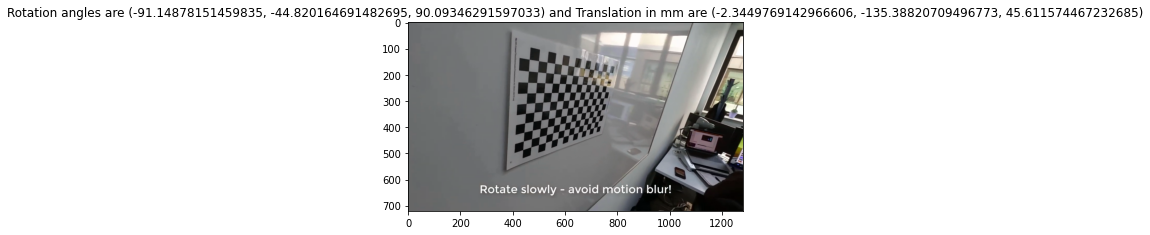

In [17]:
disp_count = 20
while disp_count>0:
    ret,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(row_corner,col_corner), flags = cv2.CALIB_CB_FAST_CHECK)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

    #calculating rotational and translation vectors by PnP
    ret,rot_vec, trans_vec = cv2.solvePnP(object_points,corners2,cam_mat,dist_param)

    r = rotation.from_rotvec(rot_vec.T).as_euler('xyz',degrees=True)

    print("Rotation Euler Angles are",r[0][0], r[0][1], r[0][2])
    print("Translation in mm is",trans_vec[0][0], trans_vec[1][0], trans_vec[2][0])

    plt.imshow(img)
    plt.title("Rotation angles are {} and Translation in mm are {}".format((r[0][0], r[0][1], r[0][2]),(trans_vec[0][0], trans_vec[1][0], trans_vec[2][0])))
    plt.show()    
    disp_count-=1